# Dice Detection Project
Dice detection project for Computer Vision (include description)

Import dependencies

In [40]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator

Project constants

In [61]:
DATASET_PATH = "./dataset-images/"
model = YOLO("yolo11n.pt")

Example code

8569800

0: 448x640 2 persons, 3 cups, 2 chairs, 1 dining table, 1 laptop, 94.0ms
Speed: 4.0ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


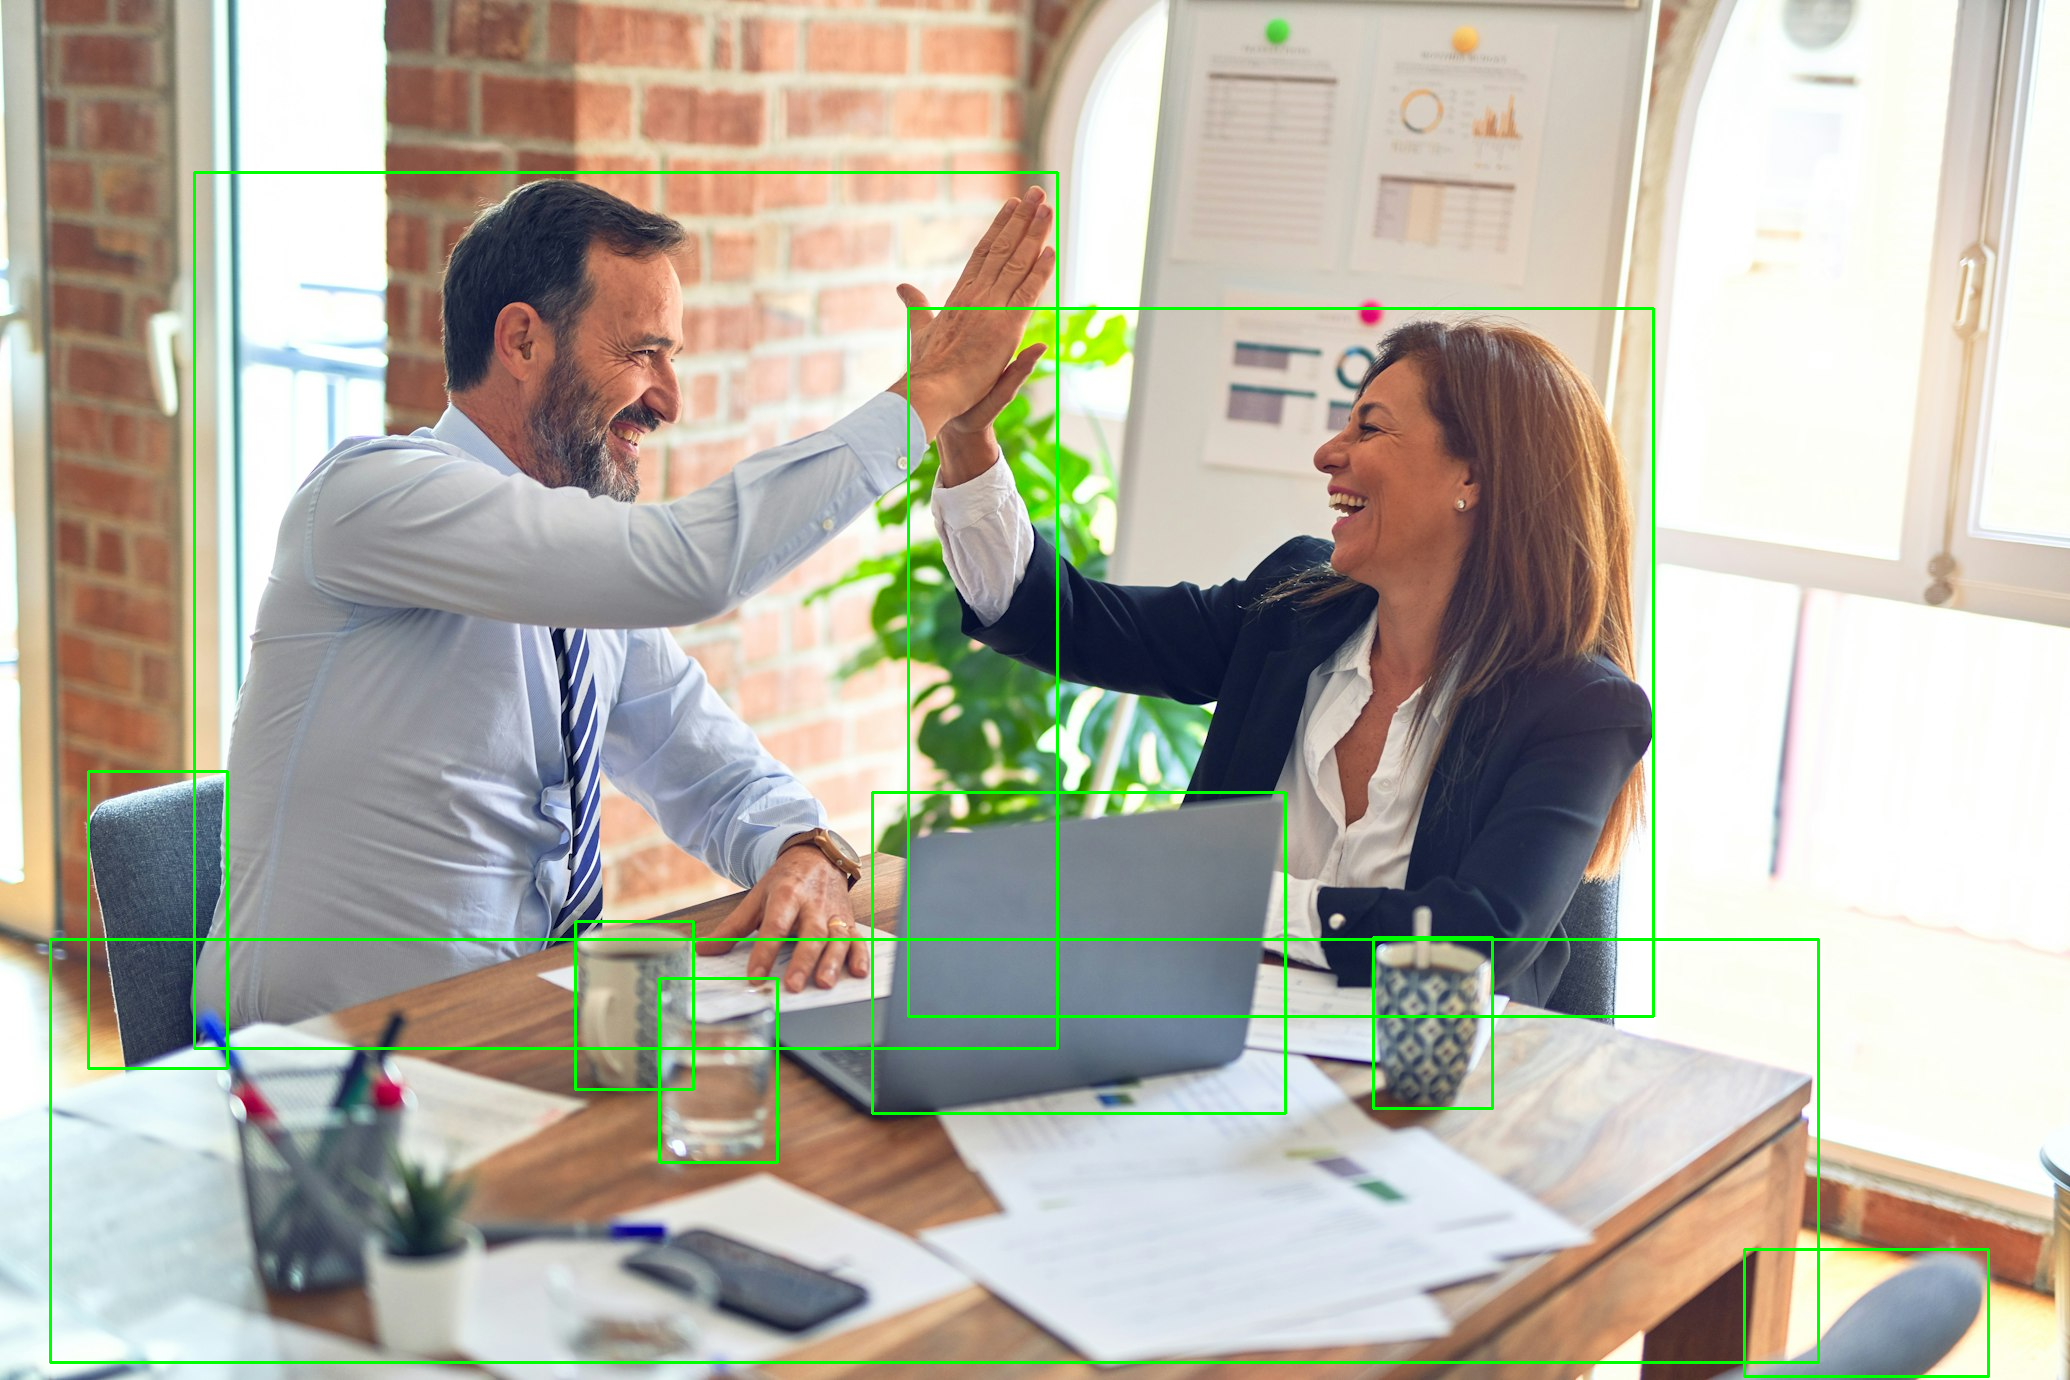

In [ ]:
response = requests.get("https://images.unsplash.com/photo-1600880292203-757bb62b4baf?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80")
image = Image.open(BytesIO(response.content))
image = np.asarray(image)

results = model.predict(image)

# Convert the image to BGR format for OpenCV
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Draw bounding boxes on the image
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Convert the image back to RGB format for display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
Image.fromarray(image_rgb)

### Example with dice


0: 640x640 1 cell phone, 127.0ms
Speed: 4.0ms preprocess, 127.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


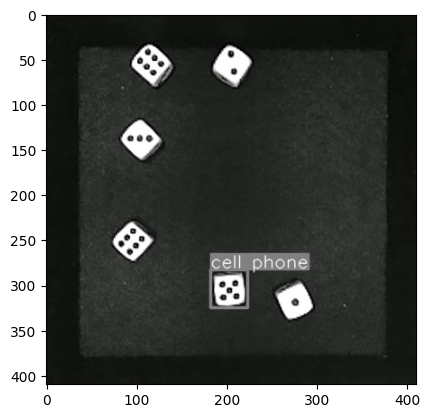

In [ ]:
img = Image.open("./dataset-images/000ac425-289e-4ab8-af15-7228b485824e.jpg")
img = np.asarray(img)

results = model.predict(img)

for r in results:
    annotator = Annotator(img)
    
    boxes = r.boxes
    for box in boxes:
        
        b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
        c = box.cls
        annotator.box_label(b, model.names[int(c)])
img = annotator.result()  
plt.imshow(img)


# # Convert the image to BGR format for OpenCV
# image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# # Draw bounding boxes on the image
# for box in results[0].boxes:
#     x1, y1, x2, y2 = map(int, box.xyxy[0])
#     cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # Convert the image back to RGB format for display
# image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# # Display the image with bounding boxes
# Image.fromarray(image_rgb)